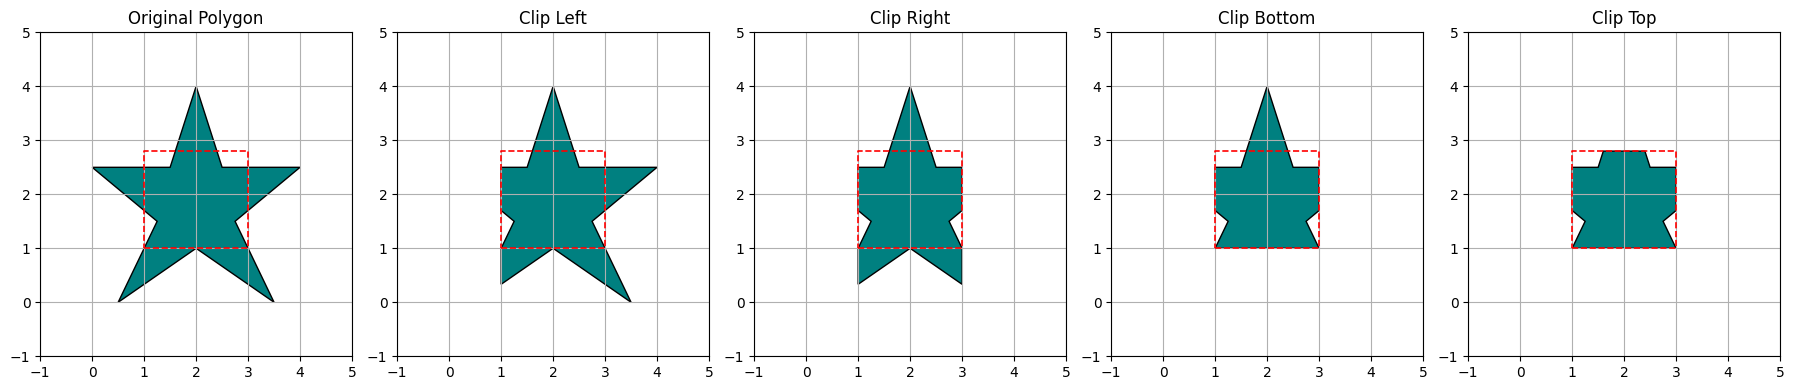

In [1]:
import matplotlib.pyplot as plt

# Helper functions
def inside(p, edge, bound):
    x, y = p
    if edge == 'left':
        return x >= bound
    elif edge == 'right':
        return x <= bound
    elif edge == 'bottom':
        return y >= bound
    elif edge == 'top':
        return y <= bound

def intersect(p1, p2, edge, bound):
    x1, y1 = p1
    x2, y2 = p2
    if edge in ['left', 'right']:
        x = bound
        y = y1 + (y2 - y1) * (bound - x1) / (x2 - x1)
    else:
        y = bound
        x = x1 + (x2 - x1) * (bound - y1) / (y2 - y1)
    return (x, y)

def sutherland_hodgman(polygon, edge, bound):
    output = []
    prev = polygon[-1]
    for curr in polygon:
        if inside(curr, edge, bound):
            if not inside(prev, edge, bound):
                output.append(intersect(prev, curr, edge, bound))
            output.append(curr)
        elif inside(prev, edge, bound):
            output.append(intersect(prev, curr, edge, bound))
        prev = curr
    return output

# Star-shaped polygon (manually defined to be symmetric and distinct)
original_polygon = [
    (2, 4), (2.5, 2.5), (4, 2.5),
    (2.75, 1.5), (3.5, 0), (2, 1),
    (0.5, 0), (1.25, 1.5), (0, 2.5),
    (1.5, 2.5)
]

# Clipping boundaries
clip_bounds = {
    'left': 1.0,
    'right': 3.0,
    'bottom': 1.0,
    'top': 2.8
}

clip_sequence = ['left', 'right', 'bottom', 'top']
polygons = [original_polygon]

# Sequential clipping
for edge in clip_sequence:
    clipped = sutherland_hodgman(polygons[-1], edge, clip_bounds[edge])
    polygons.append(clipped)

# Plotting
fig, axs = plt.subplots(1, 5, figsize=(18, 4))
titles = ['Original Polygon', 'Clip Left', 'Clip Right', 'Clip Bottom', 'Clip Top']

# Draw each step
for ax, poly, title in zip(axs, polygons, titles):
    if poly:
        x, y = zip(*poly)
        ax.fill(x, y, color='teal', edgecolor='black')

    # Draw clipping window
    ax.plot([clip_bounds['left'], clip_bounds['right'],clip_bounds['right'], clip_bounds['left'],  clip_bounds['left']],
            [clip_bounds['bottom'], clip_bounds['bottom'], clip_bounds['top'], clip_bounds['top'], clip_bounds['bottom']],
           'r--', linewidth=1.2)

    ax.set_xlim(-1, 5)
    ax.set_ylim(-1, 5)
    ax.set_title(title)
    #ax.set_aspect('equal')
    ax.grid(True)

plt.tight_layout()
plt.show()